<a href="https://colab.research.google.com/github/kadukows/rpi-plates-recognition/blob/kedzierski%2Ffinding-plate-on-image/Rozpoznawanie_znak%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, # reskalowanie tak aby otrzymać obrazy binarne 
    shear_range=0.2,      # dopasowywanie zdjec tak aby otrzymać różne przekształcenie 
    zoom_range=0.2,
    validation_split=0.2) # stosunek podział z ciągiem walidacyjnym

In [ ]:
!unzip drive/MyDrive/datasets/plates_characters/archive.zip


In [5]:
training_set = train_datagen.flow_from_directory(
    'Training Data',
    target_size=(128, 128), # zdjęcia transformowane do kwadratu
    batch_size=32,        # standardowy domyślny rozmiar batcha - tak aby zachować równowagę między liczbą iteracji a rozmiarem batcha
    class_mode='categorical',
    subset='training')  # ustawienie zestawu na zestaw treningowy

Found 24530 images belonging to 36 classes.


In [6]:
validation_set = train_datagen.flow_from_directory(
    'Training Data',
    target_size=(128, 128),
    batch_size=32,       
    class_mode='categorical',
    subset='validation')  # ustawiamy zestaw jak walidacyjny

Found 6104 images belonging to 36 classes.


In [7]:
from tensorflow.keras import layers
from keras import layers
from keras import models
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(36, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:


from keras.utils.vis_utils import plot_model
checkpoint_path = "training/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)




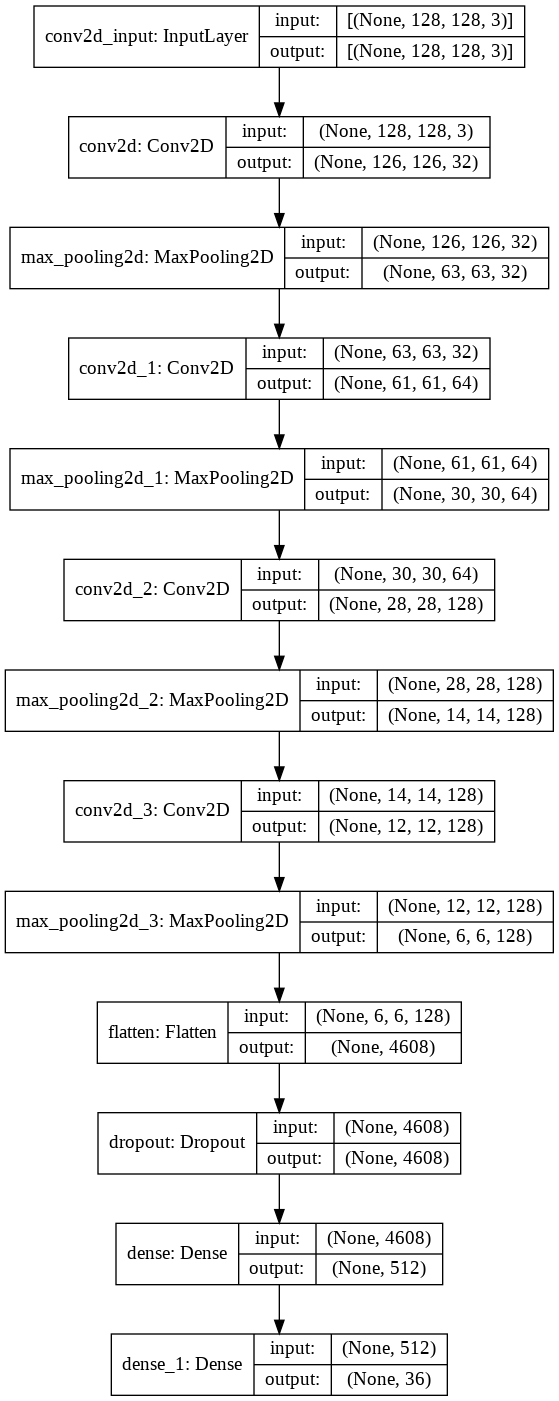

In [12]:
keras.utils.plot_model(model,  show_shapes=True)

In [ ]:
history=model.fit(x=training_set, validation_data=validation_set, epochs=30,shuffle= True,callbacks=[cp_callback])
model.save('character_recognition.model')
model.save('character_recognition.h5')
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
model.save_weights(checkpoint_path.format(epoch=35))


Epoch 1/30
767/767 [==============================] - 171s 184ms/step - loss: 0.7888 - accuracy: 0.7465 - val_loss: 0.0683 - val_accuracy: 0.9817

Epoch 00001: saving model to training/cp.ckpt
Epoch 2/30
767/767 [==============================] - 140s 183ms/step - loss: 0.0810 - accuracy: 0.9748 - val_loss: 0.0629 - val_accuracy: 0.9810

Epoch 00002: saving model to training/cp.ckpt
Epoch 3/30
767/767 [==============================] - 142s 185ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0538 - val_accuracy: 0.9877

Epoch 00003: saving model to training/cp.ckpt
Epoch 4/30
767/767 [==============================] - 143s 186ms/step - loss: 0.0442 - accuracy: 0.9848 - val_loss: 0.0494 - val_accuracy: 0.9874

Epoch 00004: saving model to training/cp.ckpt
Epoch 5/30
767/767 [==============================] - 142s 185ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0589 - val_accuracy: 0.9854

Epoch 00005: saving model to training/cp.ckpt
Epoch 6/30
767/767 [===============

In [ ]:
import matplotlib.pyplot as plt


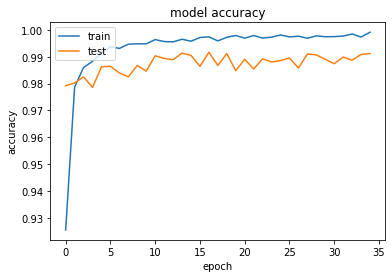

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: ignored